In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PotatoData",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names

In [5]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 0 1 1 0 0 1 1 2 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1]


In [8]:
# (32, 256, 256, 3) it shows 32 = batch size, 256, 256 = image size, 3 = no. of channel (RGB)

In [9]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    print(label_batch.numpy())

[[[135. 128. 136.]
  [128. 121. 129.]
  [131. 124. 132.]
  ...
  [152. 145. 152.]
  [152. 145. 152.]
  [148. 141. 148.]]

 [[135. 128. 136.]
  [130. 123. 131.]
  [131. 124. 132.]
  ...
  [152. 145. 152.]
  [151. 144. 151.]
  [147. 140. 147.]]

 [[133. 126. 134.]
  [132. 125. 133.]
  [132. 125. 133.]
  ...
  [151. 144. 151.]
  [150. 143. 150.]
  [148. 141. 148.]]

 ...

 [[106. 100. 112.]
  [104.  98. 110.]
  [101.  95. 107.]
  ...
  [128. 121. 129.]
  [131. 124. 132.]
  [122. 115. 123.]]

 [[104.  98. 110.]
  [103.  97. 109.]
  [101.  95. 107.]
  ...
  [128. 121. 129.]
  [131. 124. 132.]
  [120. 113. 121.]]

 [[102.  96. 108.]
  [101.  95. 107.]
  [ 99.  93. 105.]
  ...
  [132. 125. 133.]
  [135. 128. 136.]
  [125. 118. 126.]]]
[1 2 0 1 1 0 1 1 1 2 1 1 1 0 1 1 1 0 1 0 1 0 1 2 0 1 0 1 1 1 1 0]


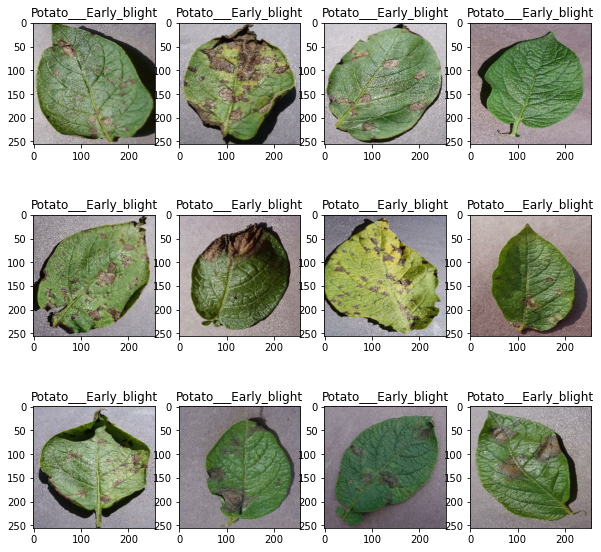

In [10]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
    #print(image_batch[0].shape)
    #print(label_batch.numpy())

In [11]:
len(dataset)

68

In [12]:
'''
#80% = training
#20% == 10% for validation and 10% for test
'''

'\n#80% = training\n#20% == 10% for validation and 10% for test\n'

In [13]:
train_size = 0.8
len(dataset)*train_size
#dataset.take(10)

54.400000000000006

In [14]:
train_ds = round(len(dataset)*train_size)

In [15]:
train_ds

54

In [16]:
test_ds = dataset.skip(train_ds)

In [17]:
len(test_ds)

14

In [18]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [19]:
val_ds = test_ds.take(round(len(dataset)*val_size))

In [20]:
len(val_ds)

7

In [21]:
test_ds = test_ds.skip(len(val_ds))

In [22]:
len(test_ds)

7

In [23]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1, test_split=0.1,
                             shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 22)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [24]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [25]:
len(train_ds)

54

In [26]:
len(val_ds)

6

In [27]:
len(test_ds)

8

In [28]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [29]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    

])

In [30]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [31]:
INPUT_SHAPE = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu' , input_shape = INPUT_SHAPE),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation = 'softmax'),
])

model.build(input_shape = INPUT_SHAPE)

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [33]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
EPOCHS = 6
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/6
54/54 [==============================] - 530s 9s/step - loss: 0.9065 - accuracy: 0.5176 - val_loss: 0.7842 - val_accuracy: 0.4896
Epoch 2/6
54/54 [==============================] - 422s 8s/step - loss: 0.7198 - accuracy: 0.7107 - val_loss: 0.4467 - val_accuracy: 0.8333
Epoch 3/6
54/54 [==============================] - 450s 8s/step - loss: 0.4629 - accuracy: 0.8040 - val_loss: 0.2765 - val_accuracy: 0.9167
Epoch 4/6
54/54 [==============================] - 471s 9s/step - loss: 0.3426 - accuracy: 0.8609 - val_loss: 0.2925 - val_accuracy: 0.8750
Epoch 5/6
54/54 [==============================] - 438s 8s/step - loss: 0.3122 - accuracy: 0.8773 - val_loss: 0.2085 - val_accuracy: 0.9323
Epoch 6/6
54/54 [==============================] - 444s 8s/step - loss: 0.2448 - accuracy: 0.8985 - val_loss: 0.1747 - val_accuracy: 0.9375


In [35]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 29s 3s/step - loss: 0.2511 - accuracy: 0.8984


In [36]:
scores

[0.25112423300743103, 0.8984375]

In [37]:
history

In [38]:
history.params

{'verbose': 1, 'epochs': 6, 'steps': 54}

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [41]:
## plot the value of accuracy

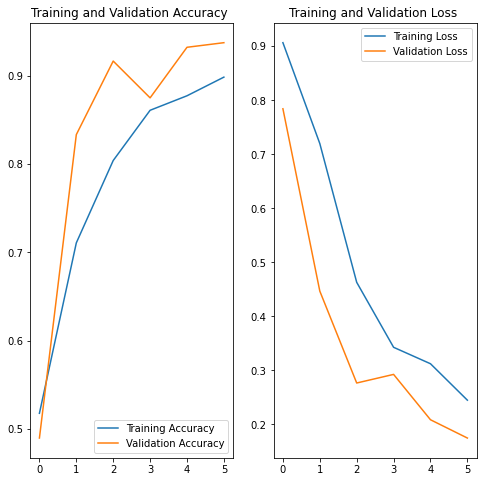

In [42]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy ")


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss ")
plt.show()


First Image to Predict
Actual Label  Potato___Early_blight
1/1 [==============================] - 2s 2s/step
Potato___Early_blight


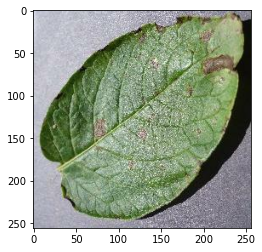

In [54]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First Image to Predict")
    
    plt.imshow(first_image)
    
    print("Actual Label ", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print(class_names[np.argmax(batch_prediction[0])])
    

In [77]:
def predict(model,img):
    image_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    image_array = tf.expand_dims(image_array,0)
    
    predictions = model.predict(image_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    
    confidence = round(100*(np.max(predictions[0])),2)
    
    return predicted_class,confidence

1/1 [==============================] - 0s 145ms/step


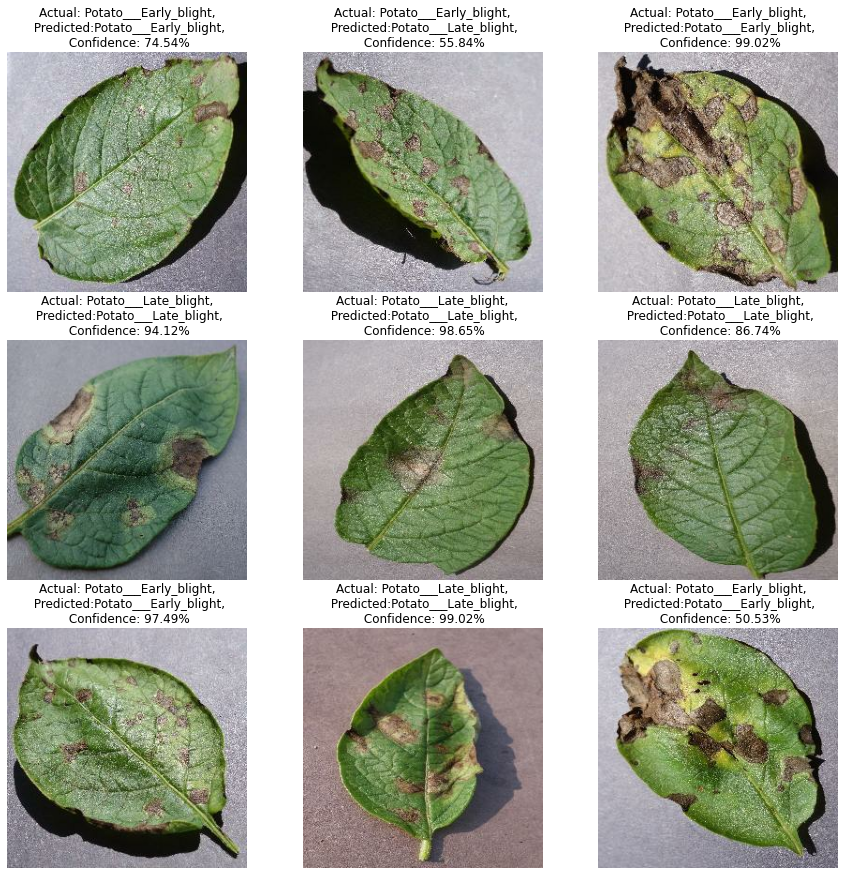

In [82]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted:{predicted_class},\n Confidence: {confidence}%")
        
        plt.axis("off")
        

In [89]:
import os
os.listdir(f"C:/Users/PC/Desktop/projects self/models")

['1']

In [90]:
model_version = 2
model.save(f"C:/Users/PC/Desktop/projects self/models/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/PC/Desktop/projects self/models/2\assets


INFO:tensorflow:Assets written to: C:/Users/PC/Desktop/projects self/models/2\assets


In [91]:
os.listdir(f"C:/Users/PC/Desktop/projects self/models")

['1', '2']

In [93]:
# for getting into integer format
model_version = max([int(i) for i in os.listdir(f"C:/Users/PC/Desktop/projects self/models")+[0]])+1
model.save(f"C:/Users/PC/Desktop/projects self/models/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/PC/Desktop/projects self/models/3\assets


INFO:tensorflow:Assets written to: C:/Users/PC/Desktop/projects self/models/3\assets
